**About Company**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a solid opportunity to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Data

In [ ]:
import zipfile, os
import shutil

local_zip = '/content/drive/MyDrive/Dataset/Cyclistic_dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/Case Study'

In [ ]:
files = [f for f in os.listdir(base_dir) if f.endswith('.csv')]
dfs = [pd.read_csv(os.path.join(base_dir, f)) for f in files]
df = pd.concat(dfs, ignore_index=True)

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


# Ask

How do annual members and casual riders use Cyclistic bikes differently?

# Data Cleaning (Prepare)

In [ ]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

There is null data on some atribute or column

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4588302 entries, 50 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 490.1+ MB


In [ ]:
duplicate_count = df.duplicated(subset='ride_id', keep=False).sum()

print(f"Number of duplicate rows based on column 'column_name': {duplicate_count}")

Number of duplicate rows based on column 'column_name': 0


In [ ]:
unique_count = df['ride_id'].nunique()
print(unique_count)

4588302


All data is unique, so there is no duplicate data

In [ ]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [ ]:
df['ride_length'] = df['ended_at'] - df['started_at']
df['ride_length_second'] = df['ride_length'].dt.total_seconds()
# df['ride_length'] = df['ride_length'].apply(lambda x: str(x).split('.')[0])

In [ ]:
df['day_of_week'] = df['started_at'].dt.day_name()
df['day_of_week'].replace({'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7}, inplace=True)

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_length_second,day_of_week
50,0D904FEC5F84A538,classic_bike,2021-06-04 07:29:18,2021-06-04 07:45:34,Orleans St & Elm St,TA1306000006,Orleans St & Elm St,TA1306000006,41.902924,-87.637715,41.902924,-87.637715,member,0 days 00:16:16,976.0,6
51,C4185F300D6B552B,classic_bike,2021-06-23 08:39:36,2021-06-23 08:41:37,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,member,0 days 00:02:01,121.0,4
53,60F97090AC85F55E,classic_bike,2021-06-27 12:26:58,2021-06-27 12:34:45,Clark St & Grace St,TA1307000127,Clark St & Leland Ave,TA1309000014,41.950780,-87.659172,41.967096,-87.667429,member,0 days 00:07:47,467.0,1
56,FBC7B1F0160AA304,classic_bike,2021-06-01 12:30:24,2021-06-01 12:33:02,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,41.889177,-87.638506,41.888716,-87.644448,member,0 days 00:02:38,158.0,3
57,37A52001AEEFA4E5,classic_bike,2021-06-01 11:32:17,2021-06-01 11:34:43,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,member,0 days 00:02:26,146.0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4588302 entries, 50 to 5595062
Data columns (total 16 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  ride_length         timedelta64[ns]
 14  ride_length_second  float64        
 15  day_of_week         int64          
dtypes: datetime64[ns](2), float64(5), int64(1), object(7), timedelta64[ns](1)
memory usage: 595.1+ MB


# Analyze

In [ ]:
mean_ride = df['ride_length_second'].mean()
print(f"mean of ride length (in minutes) : {mean_ride/60}")

max_ride = df['ride_length_second'].max()
print(f"max of ride length (in minutes) : {max_ride}")

mode_day = df['day_of_week'].mode()
print(f"mode of day : {mode_day}")

mean of ride length (in minutes) : 21.810627940357893
max of ride length (in minutes) : 3356649.0
mode of day : 0    7
Name: day_of_week, dtype: int64


In [ ]:
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length,ride_length_second,day_of_week
count,4588302,4588302,4.588302e+06,4.588302e+06,4.588302e+06,4.588302e+06,4588302,4.588302e+06,4.588302e+06
mean,2021-07-25 06:09:13.978665984,2021-07-25 06:31:02.616342016,4.190304e+01,-8.764350e+01,4.190333e+01,-8.764374e+01,0 days 00:21:48.637676421,1.308638e+03,4.106048e+00
min,2021-01-01 00:02:24,2021-01-01 00:08:39,4.164850e+01,-8.783000e+01,4.164850e+01,-8.783000e+01,-1 days +23:04:06,-3.354000e+03,1.000000e+00
25%,2021-06-04 17:34:07,2021-06-04 17:55:22.750000128,4.188224e+01,-8.765549e+01,4.188248e+01,-8.765598e+01,0 days 00:06:57,4.170000e+02,2.000000e+00
50%,2021-07-28 17:33:49,2021-07-28 17:51:18.500000,4.189766e+01,-8.764055e+01,4.189820e+01,-8.764098e+01,0 days 00:12:12,7.320000e+02,4.000000e+00
75%,2021-09-18 15:36:13,2021-09-18 16:02:46.750000128,4.192628e+01,-8.762769e+01,4.192676e+01,-8.762769e+01,0 days 00:22:07,1.327000e+03,6.000000e+00
max,2021-12-31 23:59:48,2022-01-03 17:32:18,4.206485e+01,-8.752823e+01,4.216812e+01,-8.752452e+01,38 days 20:24:09,3.356649e+06,7.000000e+00
std,NaN,NaN,4.034515e-02,2.331657e-02,4.049090e-02,2.352721e-02,0 days 03:04:25.503842186,1.106550e+04,2.084570e+00


There is ride length with minus value, assume it is wrong data so need to clean it

In [ ]:
temp = df[df['ride_length_second'] <= 0]
print(f'count of data with ride length zero or below : {temp.value_counts().sum()}')

count of data with ride length zero or below : 198


In [ ]:
df = df[df['ride_length_second'] > 0]

In [ ]:
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length,ride_length_second,day_of_week
count,4588104,4588104,4.588104e+06,4.588104e+06,4.588104e+06,4.588104e+06,4588104,4.588104e+06,4.588104e+06
mean,2021-07-25 06:07:47.642858752,2021-07-25 06:29:36.358344192,4.190304e+01,-8.764350e+01,4.190333e+01,-8.764374e+01,0 days 00:21:48.715487050,1.308715e+03,4.106076e+00
min,2021-01-01 00:02:24,2021-01-01 00:08:39,4.164850e+01,-8.783000e+01,4.164850e+01,-8.783000e+01,0 days 00:00:01,1.000000e+00,1.000000e+00
25%,2021-06-04 17:33:46.249999872,2021-06-04 17:54:50.750000128,4.188224e+01,-8.765549e+01,4.188248e+01,-8.765598e+01,0 days 00:06:57,4.170000e+02,2.000000e+00
50%,2021-07-28 17:33:09.500000,2021-07-28 17:50:45.500000,4.189766e+01,-8.764055e+01,4.189820e+01,-8.764098e+01,0 days 00:12:12,7.320000e+02,4.000000e+00
75%,2021-09-18 15:35:33.249999872,2021-09-18 16:02:12.249999872,4.192628e+01,-8.762769e+01,4.192676e+01,-8.762769e+01,0 days 00:22:07,1.327000e+03,6.000000e+00
max,2021-12-31 23:59:48,2022-01-03 17:32:18,4.206485e+01,-8.752823e+01,4.216812e+01,-8.752452e+01,38 days 20:24:09,3.356649e+06,7.000000e+00
std,NaN,NaN,4.034545e-02,2.331664e-02,4.049121e-02,2.352724e-02,0 days 03:04:25.734262810,1.106573e+04,2.084562e+00


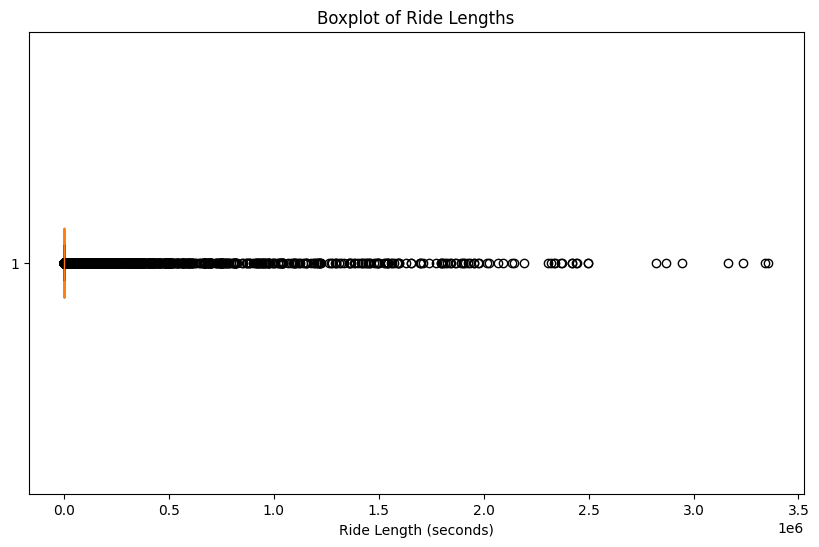

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['ride_length_second'], vert=False)
plt.xlabel('Ride Length (seconds)')
plt.title('Boxplot of Ride Lengths')
plt.show()

Note: There is suspicious data with ride length up to 38 days, maybe need to pre-process it

In [ ]:
ride_length_average_user = df.groupby(['member_casual'])['ride_length_second'].mean().reset_index()
ride_length_average_user

,member_casual,ride_length_second
0,casual,1950.609075
1,member,791.040519


In [ ]:
ride_length_average_day = df.groupby(['day_of_week'])['ride_length_second'].mean().reset_index()
ride_length_average_day

,day_of_week,ride_length_second
0,1,1670.963078
1,2,1238.843528
2,3,1094.313616
3,4,1083.528699
4,5,1093.631569
5,6,1248.547117
6,7,1571.848225


In [ ]:
rides_by_day = df.groupby(['day_of_week']).size().reset_index(name='number_of_rides')
rides_by_day

,day_of_week,number_of_rides
0,1,714966
1,2,575407
2,3,603052
3,4,615810
4,5,597673
5,6,655808
6,7,825388


In [ ]:
users_day2 = df.groupby(['day_of_week', 'member_casual']).size().reset_index(name='number_of_rides')
users_day2

,day_of_week,member_casual,number_of_rides
0,1,casual,403754
1,1,member,311212
2,2,casual,228931
3,2,member,346476
4,3,casual,214932
5,3,member,388120
6,4,casual,218129
7,4,member,397681
8,5,casual,224204
9,5,member,373469


# Share

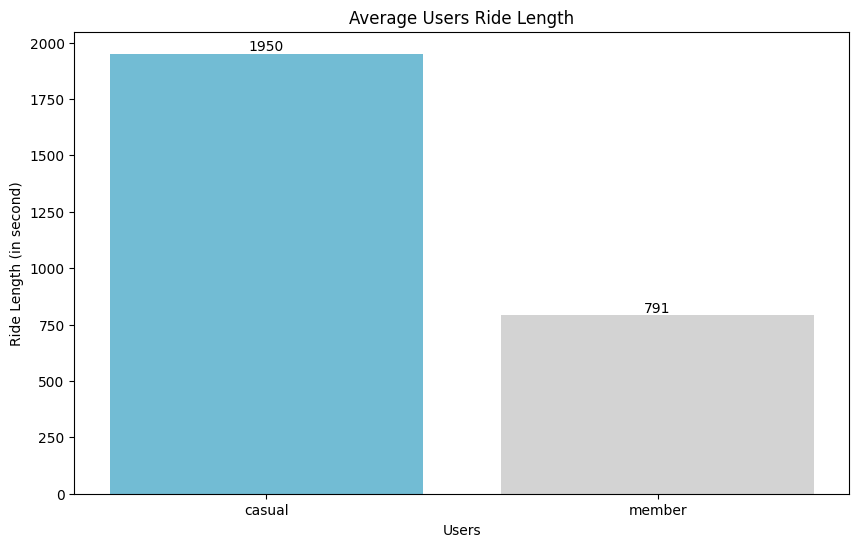

In [ ]:
ride_length_average_user = df.groupby(['member_casual'])['ride_length_second'].mean().reset_index()

colors = ["#72BCD4", "#D3D3D3"]
plt.figure(figsize=(10, 6))
bars = plt.bar(ride_length_average_user['member_casual'], ride_length_average_user['ride_length_second'], color=colors)
plt.xlabel('Users')
plt.ylabel('Ride Length (in second)')
plt.title('Average Users Ride Length')
plt.xticks()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')
plt.show()

Finding: There is an interesting thing where casual riders have a higher average ride length than member riders. Maybe it has something to do with the number of casual raiders and members

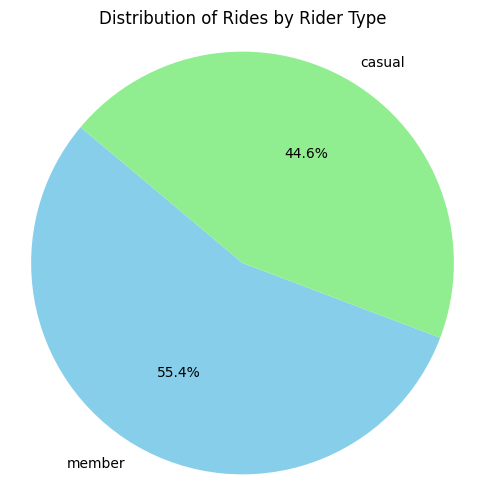

In [ ]:
rider_counts = df['member_casual'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(rider_counts, labels=rider_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Rides by Rider Type')
plt.axis('equal')

plt.show()

Finding: It turns out that the number of member riders is higher than casual riders. The possible reason is that the ride length for rider members is less than casual riders, maybe because of frequency of rides. For member they typically use the bike-sharing service for commuting or short, frequent trips. They might ride for shorter distances but do so more often. While casual riders, often tourists or occasional users, may use the service for longer rides or leisure activities, like exploring the city or recreational purposes, which tend to take more time.

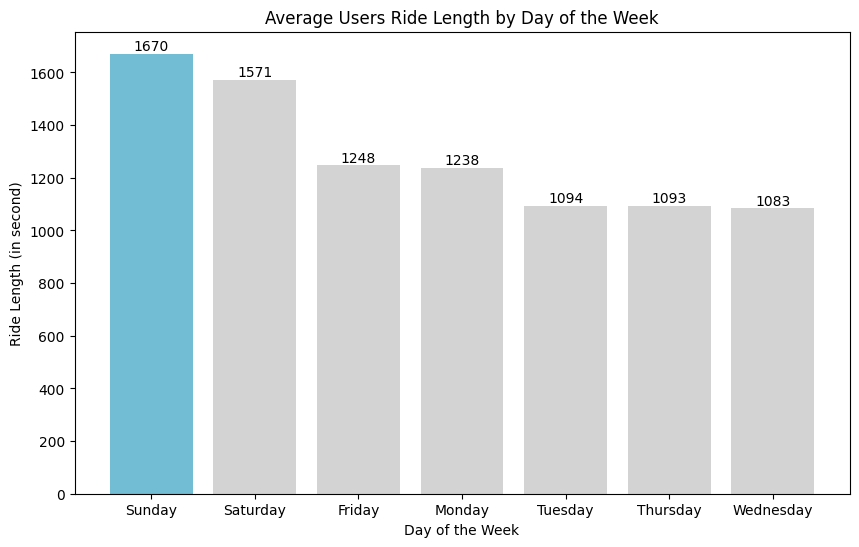

In [ ]:
ride_length_average_day = df.groupby(['day_of_week'])['ride_length_second'].mean().sort_values(ascending=False).reset_index()
ride_length_average_day['day_of_week'].replace({1:'Sunday',2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday',7:'Saturday'}, inplace=True)

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 6))
bars = plt.bar(ride_length_average_day['day_of_week'], ride_length_average_day['ride_length_second'], color=colors)
plt.xlabel('Day of the Week')
plt.ylabel('Ride Length (in second)')
plt.title('Average Users Ride Length by Day of the Week')
plt.xticks()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')
plt.show()

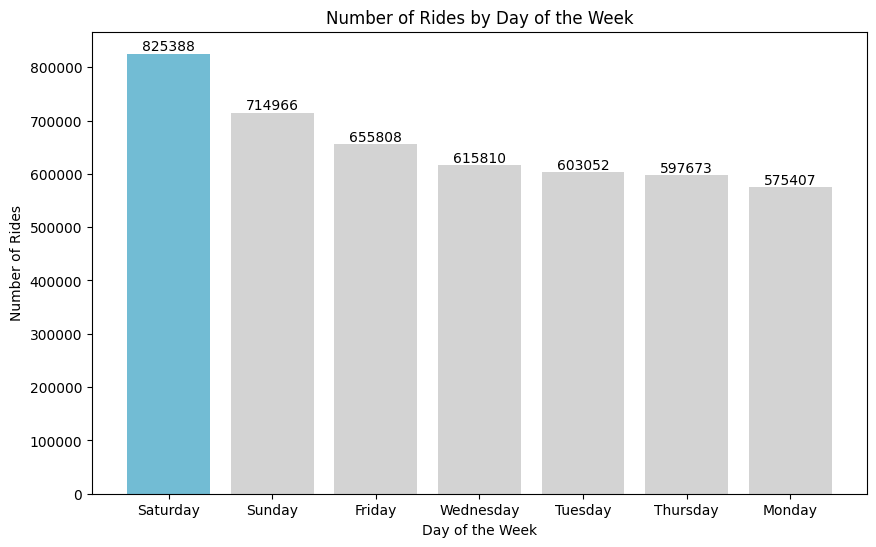

In [ ]:
rides_by_day = df.groupby(['day_of_week']).size().sort_values(ascending=False).reset_index(name='number_of_rides')
rides_by_day['day_of_week'].replace({1:'Sunday',2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday',7:'Saturday'}, inplace=True)

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 6))
bars = plt.bar(rides_by_day['day_of_week'], rides_by_day['number_of_rides'], color=colors)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Day of the Week')
plt.xticks()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')
plt.show()

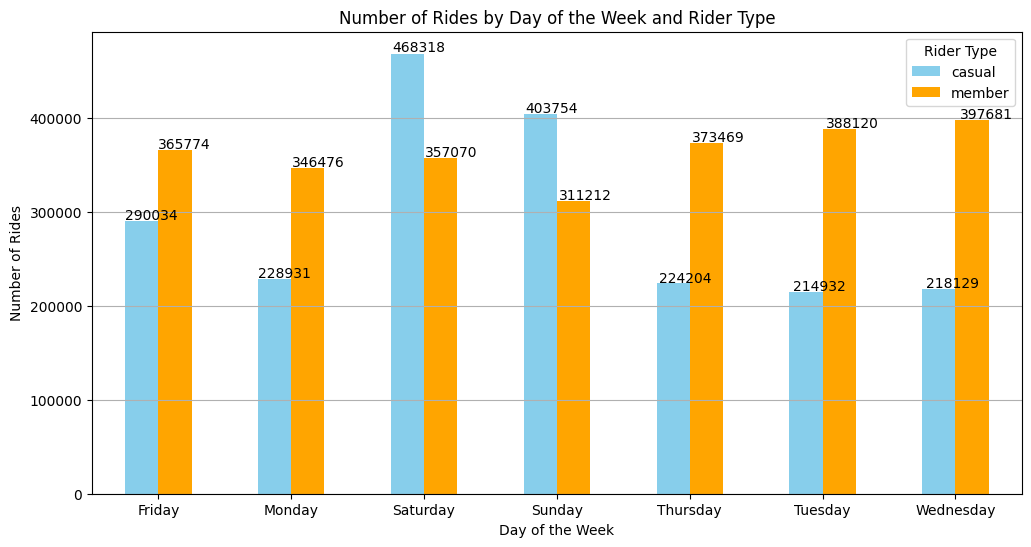

In [ ]:
users_day2 = df.groupby(['day_of_week', 'member_casual']).size().reset_index(name='number_of_rides')
users_day2['day_of_week'].replace({1:'Sunday',2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday',7:'Saturday'}, inplace=True)
users_day2_pivot = users_day2.pivot(index='day_of_week', columns='member_casual', values='number_of_rides')

ax = users_day2_pivot.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Day of the Week and Rider Type')
plt.xticks(rotation=0)
plt.legend(title='Rider Type')
plt.grid(axis='y')

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

Finding: We can see that member riders usually use cyclistic on weekday, maybe they are worker or student who use cyclistic to go to work or school. Differ from casual riders who use cyclistic usually on weekend, maybe it's people who use cyclist to have fun during their holidays or even tourists

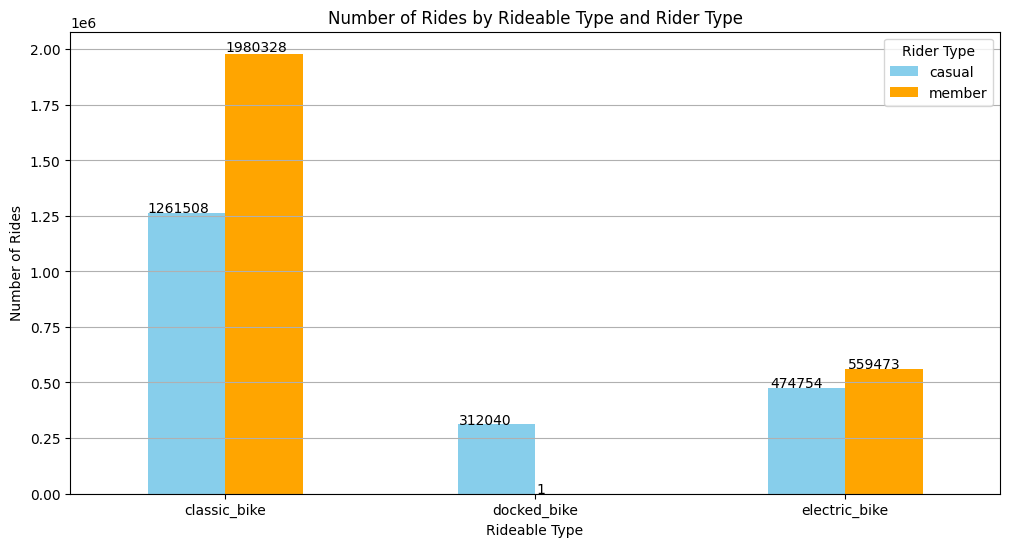

In [ ]:
users_rideable_type = df.groupby(['rideable_type', 'member_casual']).size().reset_index(name='number_of_rides')
users_rideable_type_pivot = users_rideable_type.pivot(index='rideable_type', columns='member_casual', values='number_of_rides')

ax = users_rideable_type_pivot.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Rideable Type and Rider Type')
plt.xticks(rotation=0)
plt.legend(title='Rider Type')
plt.grid(axis='y')

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

Finding: Turns out casual riders prefer to use docked bike rather than member riders, because they are easier to find and don't require a subscription or membership. They might choose docked bikes for one-time or short-term use. Members are typically regular users who benefit from the flexibility and convenience of undocked or dockless bikes. These bikes can be picked up and dropped off almost anywhere, which is more convenient for daily commuting or frequent use.